<a href="https://colab.research.google.com/github/sivacharan93/DL-A1/blob/master/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Installing and importing required libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
plt.style.use('default')

!pip install librosa 
import librosa


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch 0 	| Test Loss = 1.81 	| Test Accuracy = 0.66
Epoch 10 	| Test Loss = 1.54 	| Test Accuracy = 0.93
Epoch 20 	| Test Loss = 1.51 	| Test Accuracy = 0.95
Epoch 30 	| Test Loss = 1.5 	| Test Accuracy = 0.96
Epoch 40 	| Test Loss = 1.5 	| Test Accuracy = 0.96
Epoch 50 	| Test Loss = 1.49 	| Test Accuracy = 0.97
Epoch 60 	| Test Loss = 1.49 	| Test Accuracy = 0.97
Epoch 70 	| Test Loss = 1.49 	| Test Accuracy = 0.97
Epoch 80 	| Test Loss = 1.49 	| Test Accuracy = 0.97
Epoch 90 	| Test Loss = 1.49 	| Test Accuracy = 0.97
Epoch 100 	| Test Loss = 1.49 	| Test Accuracy = 0.97
Epoch 110 	| Test Loss = 1.49 	| Test Accuracy = 0.97
Epoch 120 	| Test Loss = 1.48 	| Test Accuracy = 0.98
Epoch 130 	| Test Loss = 1.49 	| Test Accuracy = 0.98
Epoch 140 	| Test Loss = 1.49 	| Test Accuracy = 0.98
Epoch 150

Text(0.5, 1.0, 'Convergence')

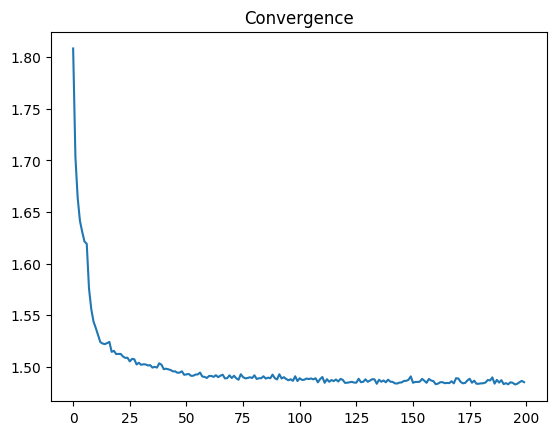

In [0]:
#Question 1
#Loading the data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

#stroring them seperately
x_train,y_train,x_valid,y_valid,x_test,y_test = mnist.train.images,\
                                  mnist.train.labels, mnist.validation.images,\
                                  mnist.validation.labels,mnist.test.images,\
                                  mnist.test.labels

#next_batch
def next_batch(x,y,start,batch_size):
    return x[start:start + batch_size],y[start:start + batch_size]
                                  
#Network Parameters
n_input = x_train.shape[1]     #784 pixels                             
n_classes = y_train.shape[1]   #10 classes                           
hidden_units = 1024

#Defining hyperparamters
batch_size = 500
n_epoch = 200
display_f = 10
learning_rate = 0.0001

#Calc number of iterations in each epoch
n_iter = len(x_train)//batch_size
                                  
#layer function
def layer(x,hidden_units,name,relu_flag=True):
  input_dim = int(x.get_shape()[1])
  #init = tf.truncated_normal([input_dim,hidden_units],stddev=0.01)  
  w = tf.get_variable('w_' + name,dtype=tf.float32,initializer=\
                      tf.truncated_normal([input_dim,hidden_units],stddev=0.01))
  b = tf.get_variable('b_' + name,dtype=tf.float32,\
                      initializer=tf.constant(0., shape=[hidden_units], dtype=tf.float32))
  if relu_flag ==True:
     return tf.nn.relu(x@w+b)
  else:
     return tf.nn.softmax(x@w+b)
  
#Creating the graph
tf.reset_default_graph()
x = tf.placeholder(tf.float32,[None,784])
y = tf.placeholder(tf.float32,[None,10])

layer_1 = layer(x,hidden_units,'layer_1',True)
layer_2 = layer(layer_1,hidden_units,'layer_2',True)
layer_3 = layer(layer_2,hidden_units,'layer_3',True)
layer_4 = layer(layer_3,hidden_units,'layer_4',True)
layer_5 = layer(layer_4,hidden_units,'layer_5',True)
layer_out = layer(layer_5,n_classes,'output',False)

#loss, optimizer & accuracy
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y,\
                                     logits=layer_out), name='loss')
train_optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)
correct_pred = tf.equal(tf.argmax(layer_out, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

saver = tf.train.Saver()

with tf.Session()  as sess:
  tf.global_variables_initializer().run()
  err = np.zeros(n_epoch)
  for epoch in range(n_epoch):
   # print('Epoch ', str(epoch))
#     print('_'*30)
    
    for itr in range(n_iter):
      
      
      x_batch,y_batch = next_batch(x_train,y_train,itr*batch_size,batch_size)

      sess.run(train_optimizer, feed_dict={x:x_batch,y:y_batch})
      
#       if itr%display_f == 0:
#         batch_loss, batch_accuracy = sess.run([loss,accuracy],feed_dict={x:x_batch,y:y_batch})
        
#         print("Iteration", str(itr), "\t| Batch Loss =", str(round(batch_loss,2)), "\t| Batch Accuracy =", str(round(batch_accuracy,2)))
    #Validation after each epoch
#     valid_loss, valid_accuracy = sess.run([loss,accuracy],feed_dict={x:x_valid,y:y_valid})
#     print('_'*30)      
#     print("Epoch", str(epoch), "\t| Validation Loss =", str(round(valid_loss,2)), "\t| Validation Accuracy =", str(round(valid_accuracy,2)))
#     print('_'*30)
    #Test loss and accuracy
    err[epoch], test_accuracy = sess.run([loss,accuracy],feed_dict={x:x_test,y:y_test})
    
    saver.save(sess, "Model_1")
    if epoch%display_f == 0:
      print("Epoch", str(epoch), "\t| Test Loss =", str(round(err[epoch],2)), "\t| Test Accuracy =", str(round(test_accuracy,2)))
    
    
  #y_probs, y_indices = sess.run(tf.nn.top_k(layer_out, k=10), feed_dict={x:x_test[:1000],y:y_test[:1000]})
plt.figure()
plt.plot(err)
plt.title('Convergence')    
   

The model reaches the 98% accuracy at 160 epoch and then stabilizes. The hyperparameters are the following batch_size = 500 | n_epoch = 200 | learning_rate = 0.0001| hidden_units = 5 | n_layers = 5. Have used Adam optimizer with softmax cross entropy as the loss function. The weights are initialized using the truncated normal function with a standard deviation of 0.01. This make sures the numbers are small and close within 2 standard deviations of the mean.

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from Model_1


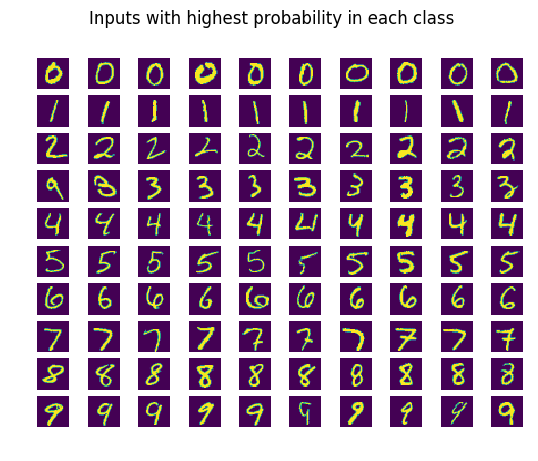

In [0]:
#1.3

with tf.Session() as sess:
  saver.restore(sess, "Model_1")
  y_probs,y_indices =sess.run(tf.nn.top_k(tf.transpose(layer_out),10), feed_dict={x:x_test,y:y_test})
  
plt.suptitle('Inputs with highest probability in each class')    
for i in range(10):
  for j in range(10):
    ax=plt.subplot2grid((10, 10), (i, j))
    ax.imshow(x_test[y_indices[i,j]].reshape((28,28)))
    plt.axis('off') 
  

The classification is good as we can see that the digits correspond to the class it was assigned.

INFO:tensorflow:Restoring parameters from Model_1


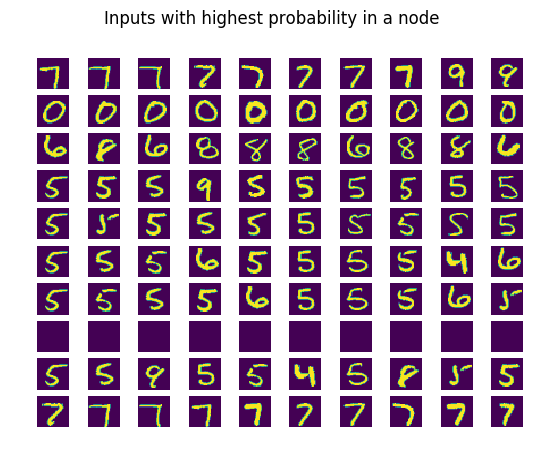

In [0]:
#1.4

with tf.Session() as sess:
  saver.restore(sess, "Model_1")
#   abc =  sess.run(layer_4, feed_dict={x:x_test,y:y_test})
#   print(abc.shape)
  
  y_probs,y_indices =sess.run(tf.nn.top_k(tf.transpose(layer_3)[545:555,:],10), feed_dict={x:x_test[:1000],y:y_test[:1000]})
  #print(y_probs,y_indices)
plt.suptitle('Inputs with highest probability in a node')    
for i in range(10):
  for j in range(10):
    ax=plt.subplot2grid((10, 10), (i, j))
    if  y_probs[i,j]==0:   
      ax.imshow(np.zeros(784).reshape((28,28))) 
    else:
      ax.imshow(x_test[y_indices[i,j]].reshape((28,28)))
      
    plt.axis('off')



Some nodes dont have the identical inputs as compared to the output layer. Some nodes arent activated. As we move forward in a feed forward neural network we move from low level features to higher level features. We can expect more compact ans salient representation of the data. I deal situation would be having all the nodes with 100% purity.  Numbers with similiar features could be the reason why different numbers are in the same node.

Text(0.5, 1.0, 'T-SNE of 1000 MNIST Images ')

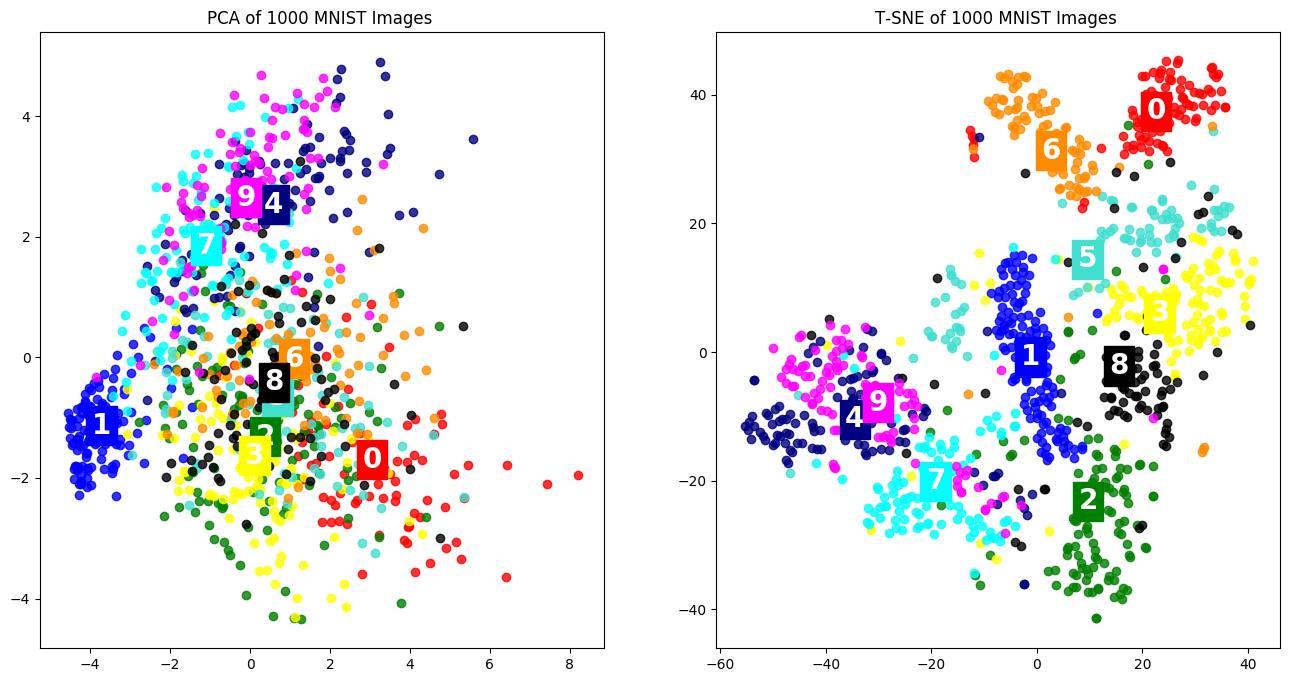

In [0]:
#1.5 # Give axis labels

X = x_test[:1000]
Y = np.argmax(y_test[:1000],1)
#print(X,Y)

#PCA
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

#TSNE
tsne = TSNE(n_components=2, random_state=0)
X_s = tsne.fit_transform(X)



# print('explained variance ratio (first two components): %s'
#       % str(pca.explained_variance_ratio_))

fig = plt.figure(figsize=(16, 8))
ax=plt.subplot2grid((1, 2), (0, 0))
#plt.figure()
colors = ['red','blue','green','yellow','navy', 'turquoise', 'darkorange','cyan','black','magenta']
lw = 2

for color, i in zip(colors, list(range(10))):
    ax.scatter(X_r[Y == i, 0], X_r[Y == i, 1], color=color, alpha=.8, lw=1,
                label=i)
    ax.annotate(i, 
                 X_r[Y == i].mean(axis=0),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=20, weight='bold',
                 color='white',
                backgroundcolor=color) 

plt.title('PCA of 1000 MNIST Images ')

ax=plt.subplot2grid((1, 2), (0, 1))
#plt.figure()
colors = ['red','blue','green','yellow','navy', 'turquoise', 'darkorange','cyan','black','magenta']
lw = 2

for color, i in zip(colors, list(range(10))):
    ax.scatter(X_s[Y == i, 0], X_s[Y == i, 1], color=color, alpha=.8, lw=1,
                label=i)
    ax.annotate(i, 
                 X_s[Y == i].mean(axis=0),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=20, weight='bold',
                 color='white',
                backgroundcolor=color)
plt.title('T-SNE of 1000 MNIST Images ')

The plot is similiar to the one share in the assignment. PCA doesnt do  a good job in clustering the inputs, whereas t-SNE does a compartively better job in segmenting the inputs though the boundaries of the clusters are close to each other which might make the process of defining the boundaries difficult.

INFO:tensorflow:Restoring parameters from Model_1


Text(0.5, 1.0, 'T-SNE of 1000 MNIST Images ')

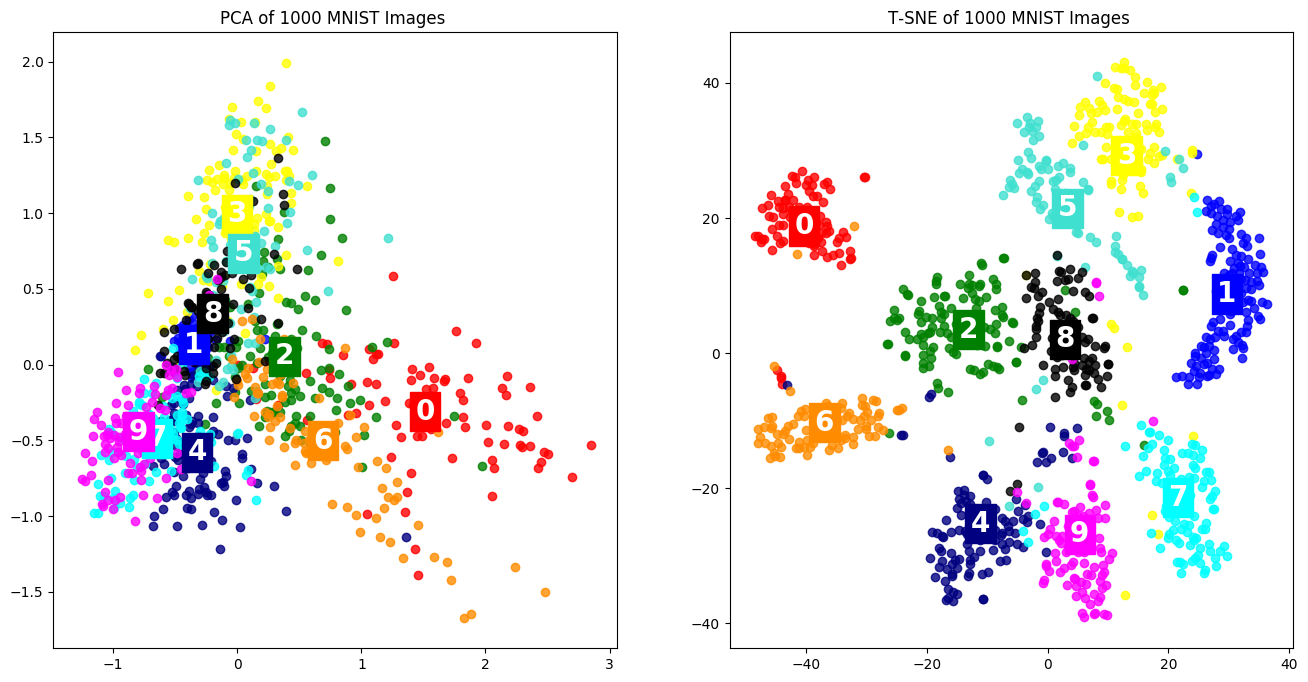

In [0]:
#1.7

with tf.Session() as sess:
  saver.restore(sess, "Model_1")
  X =sess.run(layer_1, feed_dict={x:x_test[:1000],y:y_test[:1000]})


Y = np.argmax(y_test[:1000],1)

#PCA
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

#TSNE
tsne = TSNE(n_components=2, random_state=0)
X_s = tsne.fit_transform(X)


fig = plt.figure(figsize=(16, 8))
ax=plt.subplot2grid((1, 2), (0, 0))
#plt.figure()
colors = ['red','blue','green','yellow','navy', 'turquoise', 'darkorange','cyan','black','magenta']
lw = 2

for color, i in zip(colors, list(range(10))):
    ax.scatter(X_r[Y == i, 0], X_r[Y == i, 1], color=color, alpha=.8, lw=1,
                label=i)
    ax.annotate(i, 
                 X_r[Y == i].mean(axis=0),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=20, weight='bold',
                 color='white',
                backgroundcolor=color) 

plt.title('PCA of 1000 MNIST Images ')

ax=plt.subplot2grid((1, 2), (0, 1))
#plt.figure()
colors = ['red','blue','green','yellow','navy', 'turquoise', 'darkorange','cyan','black','magenta']
lw = 2

for color, i in zip(colors, list(range(10))):
    ax.scatter(X_s[Y == i, 0], X_s[Y == i, 1], color=color, alpha=.8, lw=1,
                label=i)
    ax.annotate(i, 
                 X_s[Y == i].mean(axis=0),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=20, weight='bold',
                 color='white',
                backgroundcolor=color)
plt.title('T-SNE of 1000 MNIST Images ')


  


The segmentation on the first layer gives a better representation
in terms of classication using t-SNE but PCA still looks bleak. The gap between the segments has increased compared to the one with the raw inputs but there are still few overlapping boundaries.

INFO:tensorflow:Restoring parameters from Model_1


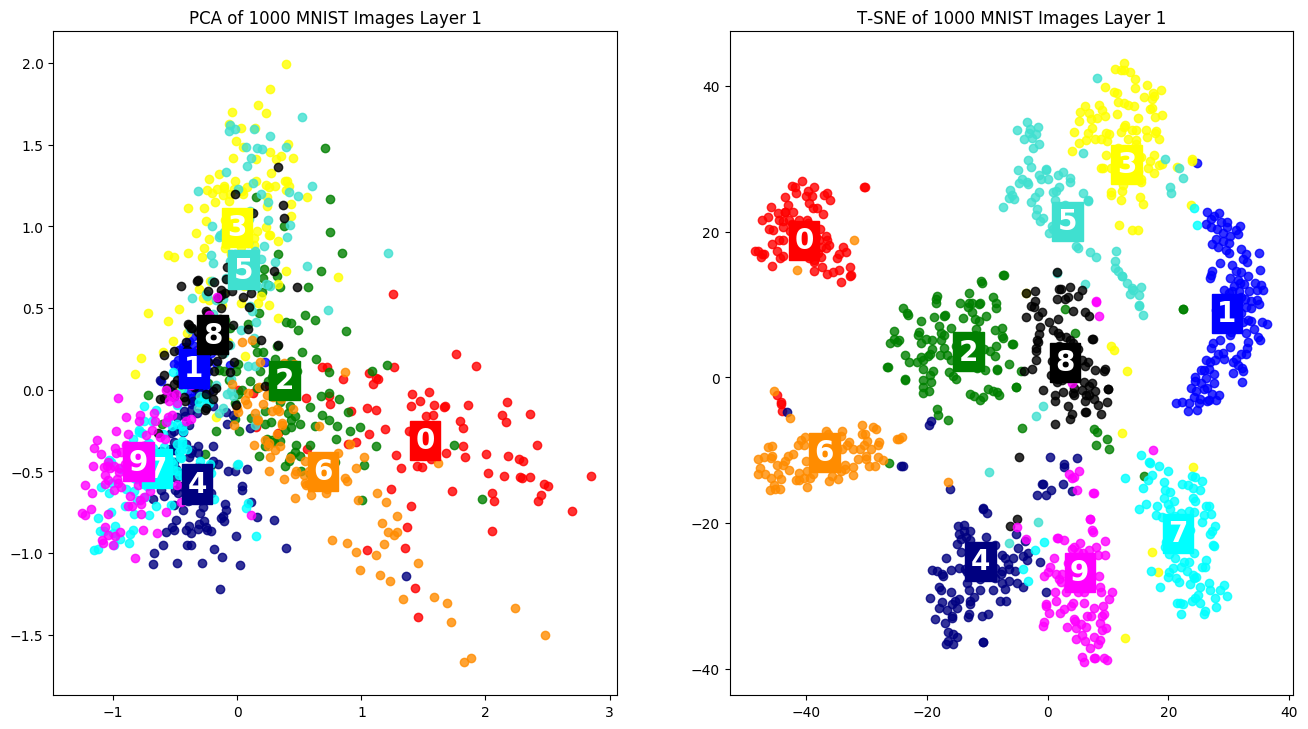

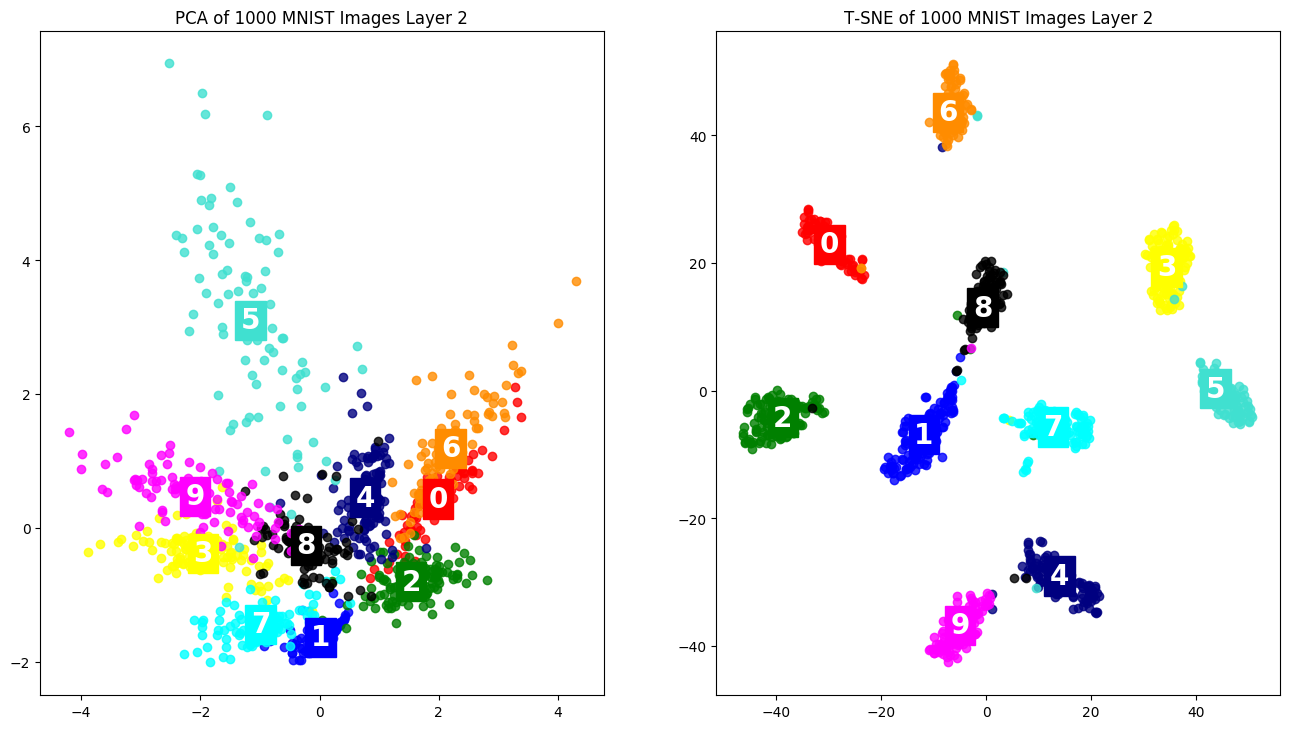

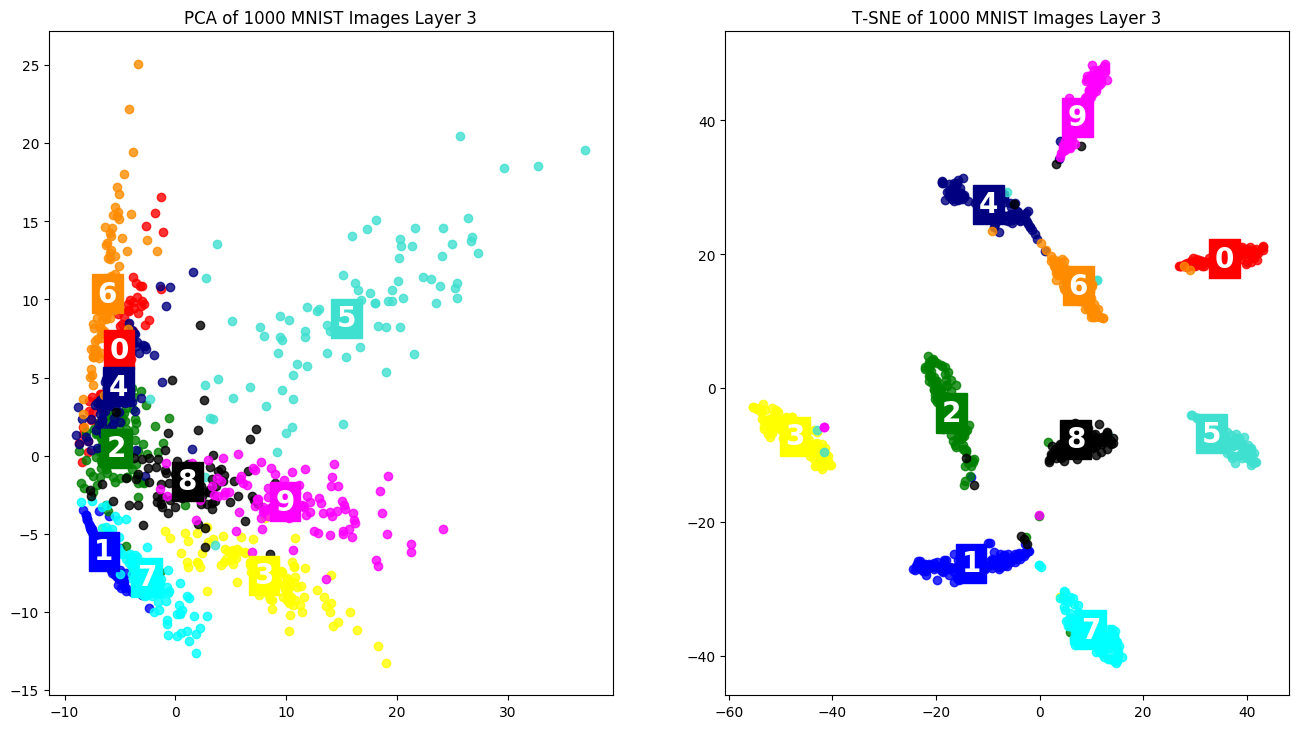

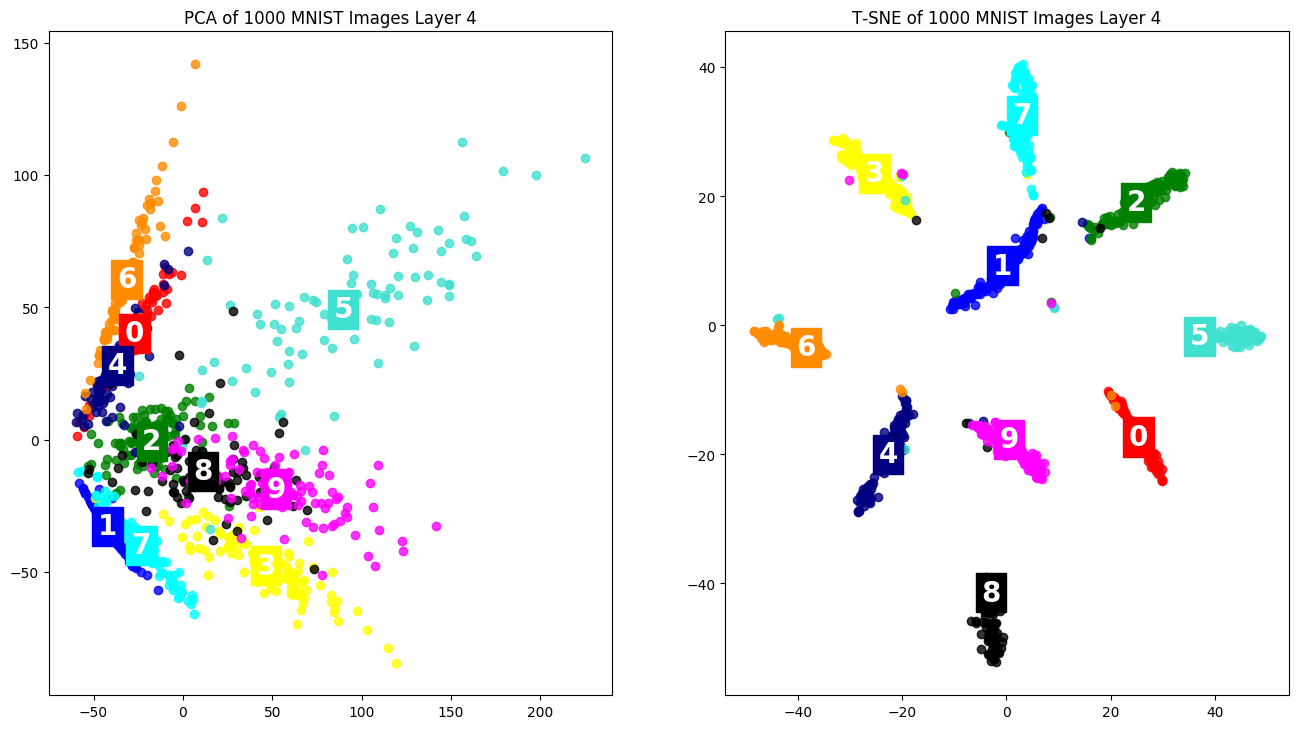

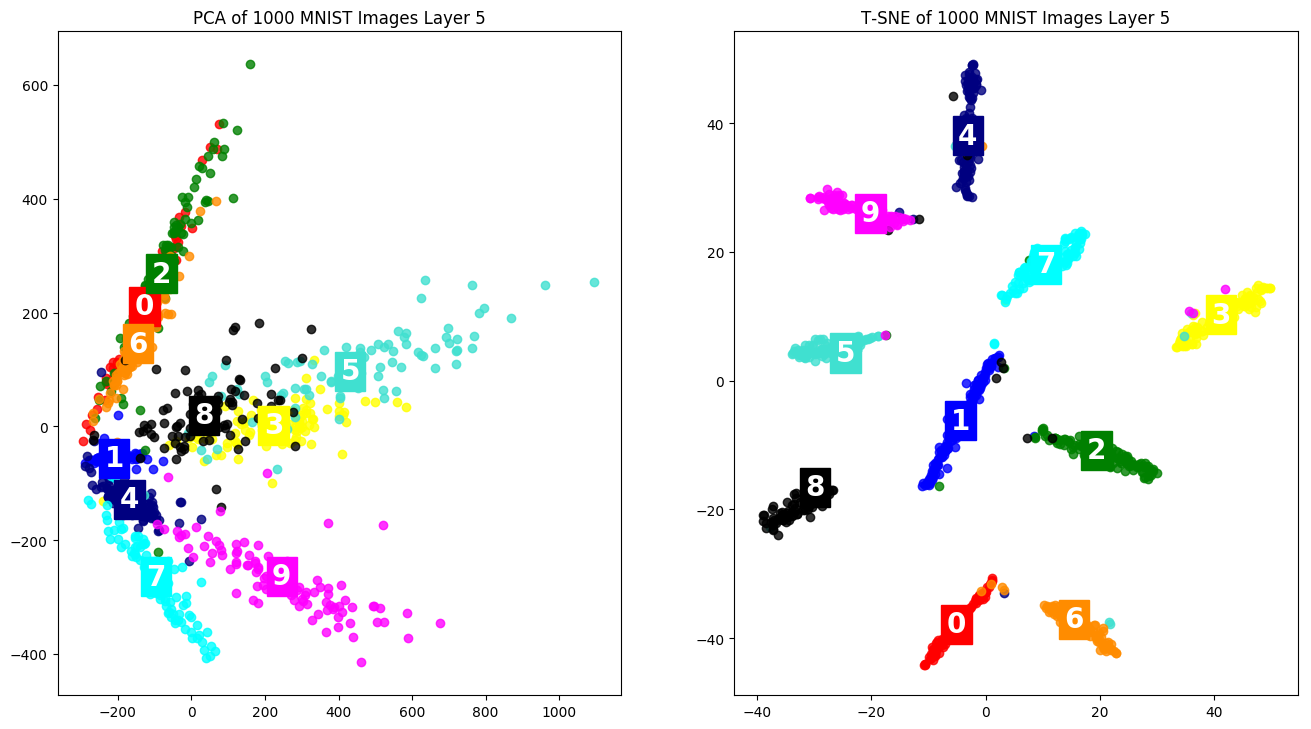

In [0]:
with tf.Session() as sess:
  saver.restore(sess, "Model_1")
  X_1,X_2,X_3,X_4,X_5 =sess.run([layer_1,layer_2,layer_3,layer_4,layer_5], feed_dict={x:x_test[:1000],y:y_test[:1000]})


Y = np.argmax(y_test[:1000],1)

#PCA
pca = PCA(n_components=2)
X_r_1 = pca.fit(X_1).transform(X_1)
X_r_2 = pca.fit(X_2).transform(X_2)
X_r_3 = pca.fit(X_3).transform(X_3)
X_r_4 = pca.fit(X_4).transform(X_4)
X_r_5 = pca.fit(X_5).transform(X_5)

#TSNE
tsne = TSNE(n_components=2, random_state=0)
X_s_1 = tsne.fit_transform(X_1)
X_s_2 = tsne.fit_transform(X_2)
X_s_3 = tsne.fit_transform(X_3)
X_s_4 = tsne.fit_transform(X_4)
X_s_5 = tsne.fit_transform(X_5)

for k in  range(1,6,1):
  X_r = eval('X_r_'+str(k))
  X_s = eval('X_s_'+str(k))
  
  fig = plt.figure(figsize=(16, 50))
  ax=plt.subplot2grid((5, 2), (0, 0))
  #plt.figure()
  colors = ['red','blue','green','yellow','navy', 'turquoise', 'darkorange','cyan','black','magenta']
  lw = 2

  for color, i in zip(colors, list(range(10))):
      ax.scatter(X_r[Y == i, 0], X_r[Y == i, 1], color=color, alpha=.8, lw=1,
                  label=i)
      ax.annotate(i, 
                   X_r[Y == i].mean(axis=0),
                   horizontalalignment='center',
                   verticalalignment='center',
                   size=20, weight='bold',
                   color='white',
                  backgroundcolor=color) 

  plt.title('PCA of 1000 MNIST Images Layer '+ str(k))

  ax=plt.subplot2grid((5, 2), (0, 1))
  #plt.figure()
  colors = ['red','blue','green','yellow','navy', 'turquoise', 'darkorange','cyan','black','magenta']
  lw = 2

  for color, i in zip(colors, list(range(10))):
      ax.scatter(X_s[Y == i, 0], X_s[Y == i, 1], color=color, alpha=.8, lw=1,
                  label=i)
      ax.annotate(i, 
                   X_s[Y == i].mean(axis=0),
                   horizontalalignment='center',
                   verticalalignment='center',
                   size=20, weight='bold',
                   color='white',
                  backgroundcolor=color)
  plt.title('T-SNE of 1000 MNIST Images Layer ' + str(k))

As we try segmentation on different layers output, the images in a segment appear to cluster close to each other and the segments are moving further away from each other. This is good as we can define the boundaries in a better way compared to that on the raw images. Once again the t-SNE does a good job compared to PCA.

In [0]:
#Question 2
sn, sr=librosa.load('train_dirty_male.wav', sr=None)
X=librosa.stft(sn, n_fft=1024, hop_length=512)
s, sr=librosa.load('train_clean_male.wav', sr=None)
S=librosa.stft(s, n_fft=1024, hop_length=512)

x_train = np.transpose(np.abs(X))
y_train = np.transpose(np.abs(S))

def snr(x,s,p):
  _,phase = librosa.magphase(x)
  #s=librosa.istft(s * phase)
  #print(p * phase,np.flipud((p * phase)[1:].conj()))
#   e = p * phase
#   f = np.flipud((p * phase)[1:512].conj())
#   print(e.shape,f.shape)
#   d =np.concatenate((e,f),axis=0) 
#   print(d.shape)
  #print(p.shape)
  p=librosa.istft(p*phase, hop_length=512,length=len(s))
  #print(p.shape)
  a = np.matmul(np.transpose(s),s)
  b = np.matmul(np.transpose(s-p),s-p)
  return 10*np.log10(a/b)





s1, sr=librosa.load('test_x_01.wav', sr=None)
S1=librosa.stft(s1, n_fft=1024, hop_length=512)
x_test_1 = np.transpose(np.abs(S1))
s2, sr=librosa.load('test_x_02.wav', sr=None)
S2=librosa.stft(s2, n_fft=1024, hop_length=512)
x_test_2 = np.transpose(np.abs(S2))



#next_batch
def next_batch(x,y,start,batch_size):
    return x[start:start + batch_size], y[start:start + batch_size]
                                  
#Network Parameters
n_input = x_train.shape[1]                                  
n_classes = y_train.shape[1]                             
hidden_units = 256

#Defining hyperparamters
batch_size = 100
n_epoch = 421
display_f = 10
learning_rate = 0.001

#Calc number of iterations in each epoch
n_iter = len(x_train)//batch_size
                                  
#layer function
def layer(x,hidden_units,name,relu_flag=True):
  input_dim = int(x.get_shape()[1])
  #init = tf.truncated_normal([input_dim,hidden_units],stddev=0.01)  
  w = tf.get_variable('w_' + name,dtype=tf.float32,initializer=\
                      tf.truncated_normal([input_dim,hidden_units],stddev=0.01))
  b = tf.get_variable('b_' + name,dtype=tf.float32,\
                      initializer=tf.constant(0., shape=[hidden_units], dtype=tf.float32))
  if relu_flag ==True:
     return tf.nn.relu(x@w+b)
  else:
     return tf.nn.softmax(x@w+b)
  
#Creating the graph
tf.reset_default_graph()
x = tf.placeholder(tf.float32,[None,x_train.shape[1]])
y = tf.placeholder(tf.float32,[None,y_train.shape[1]])

layer_1 = layer(x,hidden_units,'layer_1',True)
layer_2 = layer(layer_1,hidden_units,'layer_2',True)
layer_out = layer(layer_2,n_classes,'output',True)

#loss, optimizer & accuracy
loss = tf.reduce_mean(tf.losses.mean_squared_error(y,layer_out))
train_optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)
#correct_pred = tf.equal(tf.argmax(layer_out, 1), tf.argmax(y, 1))
accuracy, acc = tf.metrics.accuracy(labels=y, predictions= layer_out)

saver = tf.train.Saver()

with tf.Session()  as sess:
  err = np.zeros(n_epoch)
  tf.global_variables_initializer().run() 
  tf.local_variables_initializer().run()
  for epoch in range(n_epoch):
   # print('Epoch ', str(epoch))
#     print('_'*30)
    
    for itr in range(n_iter):
      
      
      x_batch,y_batch = next_batch(x_train,y_train,itr*batch_size,batch_size)
      print(y_batch.shape)
      sess.run(train_optimizer, feed_dict={x:x_batch,y:y_batch})
      
#       if itr%display_f == 0:
#         batch_loss, batch_accuracy = sess.run([loss,accuracy],feed_dict={x:x_batch,y:y_batch})
        
#         print("Iteration", str(itr), "\t| Batch Loss =", str(round(batch_loss,2)), "\t| Batch Accuracy =", str(round(batch_accuracy,2)))
    #Validation after each epoch
#     valid_loss, valid_accuracy = sess.run([loss,accuracy],feed_dict={x:x_valid,y:y_valid})
#     print('_'*30)      
#     print("Epoch", str(epoch), "\t| Validation Loss =", str(round(valid_loss,2)), "\t| Validation Accuracy =", str(round(valid_accuracy,2)))
#     print('_'*30)
    #Test loss and accuracy
    
    err[epoch],train_accuracy,out = sess.run([loss,accuracy,layer_out],feed_dict={x:x_train,y:y_train})
    d = np.transpose(out)
    snd = snr(X,s,d)
    #test_accuracy = sess.run([loss,accuracy],feed_dict={x:x_test,y:y_test})
    
    saver.save(sess, "Model_2")
    if epoch%display_f == 0:
      print("Epoch", str(epoch), "\t| Train Loss =", str(round(err[epoch],3)), "\t| SNR =", str(round(snd,2)))
    
    
  #y_probs, y_indices = sess.run(tf.nn.top_k(layer_out, k=10), feed_dict={x:x_test[:1000],y:y_test[:1000]})
plt.figure()
plt.plot(err)
plt.title('Convergence')    
    




NameError: ignored

The neural network has 2 hidden layers and the follwoing hyperparamters batch_size = 100 | n_epoch = 421 |
learning_rate = 0.001. Trincated normal with standard deviation of 0.01 was used to intialize weights. .The training loss comes down to 0.002 at the end of 420 epochs and the SNR on the groundtruth is 16.2

In [0]:
#First test file
with tf.Session() as sess:
  saver.restore(sess, "Model_2")
  out =sess.run(tf.transpose(layer_out), feed_dict={x:x_test_1})  
_,phase = librosa.magphase(S1)
p=librosa.istft(out*phase, hop_length=512,length=len(s1))   
librosa.output.write_wav('test_s_01_recons.wav', p, sr)
#Code to download the reconstructed noise free file
# from google.colab import files
# files.download('test_s_01_recons.wav')
#Audio display
from IPython.display import *
Audio("test_s_01_recons.wav", autoplay=False)

INFO:tensorflow:Restoring parameters from Model_2


In [0]:
#Second test file
with tf.Session() as sess:
  saver.restore(sess, "Model_2")
  out =sess.run(tf.transpose(layer_out), feed_dict={x:x_test_2})  
_,phase = librosa.magphase(S2)
p=librosa.istft(out*phase, hop_length=512,length=len(s2))   
librosa.output.write_wav('test_s_02_recons.wav', p, sr)
# from google.colab import files
# files.download('test_s_02_recons.wav')
from IPython.display import *
Audio("test_s_02_recons.wav", autoplay=False)  


  


INFO:tensorflow:Restoring parameters from Model_2


The output of first test file is noise free and with minute distortion whereas the second test file the output is a little distorted with small chip noise in the middle. Both of them are better interms of noise compared to the original versions.